In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [125]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
data.shape

(1460, 95)

## Препроцессинг данных

In [133]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fen

In [128]:
simple_drop = ['Id','Alley','Utilities']
data = data.drop(columns=simple_drop)

In [129]:
# разбиение категоральных фичей
cat_col = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']
for c_col in cat_col:
    data = pd.concat([data, pd.get_dummies(data[c_col])], axis=1).drop(columns=[c_col])

In [131]:
# дополнение пропущенных значений
make_new_var = ['LotFrontage']
for m_n_v in make_new_var:
    mean = data[m_n_v].mean()
    std = data[m_n_v].std()
    number_of_nulls = data[m_n_v].isnull().sum()
    random_LotFrontage = np.random.randint(mean - std, mean + std, size=number_of_nulls)

    newLotFrontage = data[m_n_v].copy()
    newLotFrontage[np.isnan(newLotFrontage)] = random_LotFrontage
    data[m_n_v] = newLotFrontage

In [ ]:
#        'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
#        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
#        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
#        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
#        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#        'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
#        'SaleCondition'

In [122]:
data['SaleCondition'].isnull().sum()

0

In [120]:
data['Neighborhood'].isna().mean()

0.0

In [123]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [134]:
sns.distplot(data["LotConfig"])

KeyError: 'LotConfig'

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [42]:
len(data['MSZoning'] == "RM")

1460

In [43]:
pd.get_dummies(data['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


## Последующие задания

In [31]:
from sklearn.model_selection import train_test_split

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

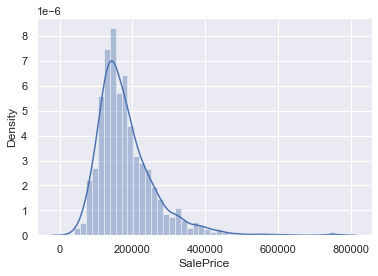

In [6]:
sns.distplot(y_train)

In [7]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

In [140]:
cross_validate(LinearRegression(), X, y, cv=5, 
               scoring={'r2_score': make_scorer(r2_score), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00398946, 0.00299263, 0.00299215, 0.00299096, 0.00299144]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_r2_score': array([nan, nan, nan, nan, nan]),
 'test_mean_squared_error': array([nan, nan, nan, nan, nan])}

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'RM'

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [8]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO

In [9]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

In [10]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

NameError: name 'numeric_features' is not defined

In [11]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO

In [12]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

NameError: name 'X_train_scaled' is not defined

In [13]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO

In [14]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO

In [15]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [16]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
736,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
180,FV,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1137,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,...,NotGiven,NotGiven,NotGiven,NotGiven,N,NotGiven,NotGiven,NotGiven,WD,Normal
385,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
522,RM,Pave,NotGiven,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


In [17]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

In [18]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)


NameError: name 'column_transformer' is not defined

In [19]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

In [20]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

NameError: name 'pipeline' is not defined

In [21]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO

In [22]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

NameError: name 'model' is not defined

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [23]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO

In [24]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

NameError: name 'mask' is not defined

In [25]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO